In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MuscleNigg import MuscleNigg
%matplotlib notebook

In [2]:
dt = 0.001
t = np.arange(0, 15, dt)


Lce_o = .045#optmal length
Fmax = 10000
Lslack =  9 * Lce_o


In [3]:
b = 0
g = 9.81
h = 1.75
m = 100

J = m*h**2/3

In [4]:
omega = 0
theta = 5*np.pi/180
T = 0

ref = 0.06

In [5]:
angle = np.zeros(t.shape)
Lmt = np.zeros(t.shape)
force = np.zeros(t.shape)
fiberLength = np.zeros(t.shape)
tendonLength = np.zeros(t.shape)
activation = np.zeros(t.shape)
parallelForce = np.zeros(t.shape)
muscleForce = np.zeros(t.shape)
muscleTorque = np.zeros(t.shape)
noiseTorque = np.zeros(t.shape)
fiberVelocity = np.zeros(t.shape)
FL = np.zeros(t.shape)

n = 0.01


In [6]:
plantarFlexor = MuscleNigg(Fmax=Fmax, Lce_o=Lce_o, Lslack=Lslack, dt = dt)
plantarFlexor.LceNorm = 0.8

In [7]:
def soleusMuscleTendonLength(theta):
    
    angle = theta * 180/np.pi
    
    Lmt = (46.4 + 7.48e-2*angle - 1.13e-4*angle**2 -3.5e-6*angle**3 + 7.35e-9*angle**4)*0.01
    
    return Lmt

def soleusMomentArm(theta):
    
    angle = theta *180/np.pi
    
    momentArm = (-4.3 + 1.3e-2*angle + 6.08e-4*angle**2 - 1.87e-6*angle**3 - 1.02e-9*angle**4)*0.01
    
    return momentArm

In [8]:
def filteredNoise(y, fc, dt, magnitude):
    
    tau = 1/(2*np.pi*fc)
    a = dt/(tau+dt)
      
    y = (1-a)*y + magnitude*a*np.random.randn(1)
    
    return y
    

In [9]:
for i in range (1,len(t)):
    
    
    #########################################################################
    angle[i] = theta*180/np.pi
    Lmt[i] = soleusMuscleTendonLength(theta)
    ############################################################
    plantarFlexor.updateMuscle(Lmt[i], n)   
    ###############################################################
    force[i] = plantarFlexor.FTendonNorm * plantarFlexor.Fmax
    fiberLength[i] = plantarFlexor.LceNorm * plantarFlexor.Lce_o
    tendonLength[i] = plantarFlexor.LseeNorm * plantarFlexor.Lce_o
    activation[i] = plantarFlexor.act
    parallelForce[i] = plantarFlexor.FkpeNorm * plantarFlexor.Fmax
    muscleForce[i] = plantarFlexor.FCENorm * plantarFlexor.Fmax
    FL[i] = plantarFlexor.FLNorm * plantarFlexor.Fmax
    fiberVelocity[i] = plantarFlexor.LceNormdot * plantarFlexor.Lce_o
    #######################################################################
    muscleTorque[i] = force[i] * soleusMomentArm(angle[i])
    ###################################################################
    noiseTorque[i] = filteredNoise(noiseTorque[i-1], 80, dt, 100) 
    ########################################################
    #plantarFlexor.updateMuscle(Lm, n)
    domegadt = (-b/J*omega + m*g*h/2/J*np.sin(theta) + 1/J*muscleTorque[i] 
                + 1/J*noiseTorque[i])
    dthetadt = omega
    
    omega = omega + dt*domegadt
    theta = theta + dt*dthetadt
    
    #################################################################
    n = max(0.01, min(50*(ref-fiberLength[i]) - 10*fiberVelocity[i], 1))
    

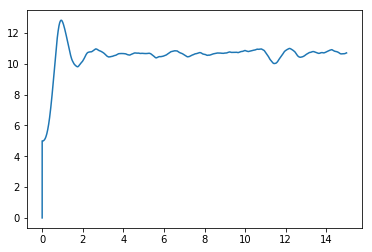

In [10]:
plt.figure()
plt.plot(t, angle)
plt.show()

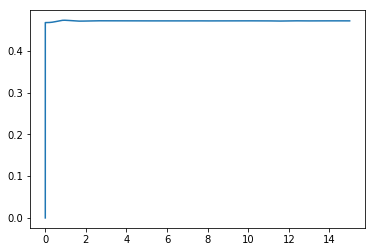

In [11]:
plt.figure()
plt.plot(t, Lmt)
plt.show()

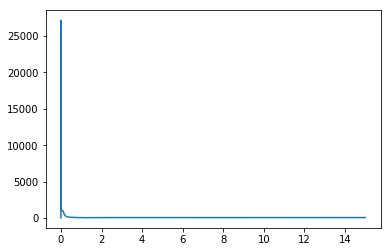

In [12]:
plt.figure()
plt.plot(t, force)
plt.show()

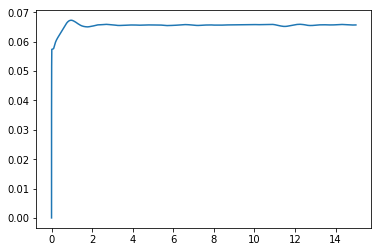

In [13]:
plt.figure()
plt.plot(t, fiberLength)
plt.show()

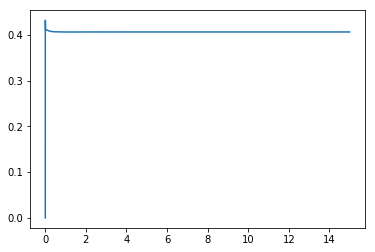

In [14]:
plt.figure()
plt.plot(t, tendonLength)
plt.show()

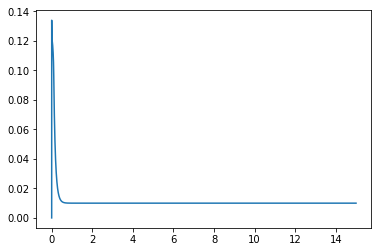

In [15]:
plt.figure()
plt.plot(t, activation)
plt.show()

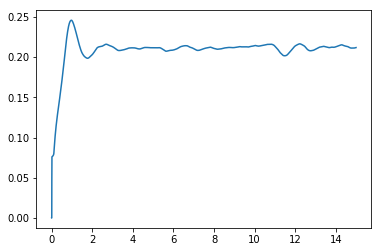

In [16]:
plt.figure()
plt.plot(t, parallelForce)
plt.show()

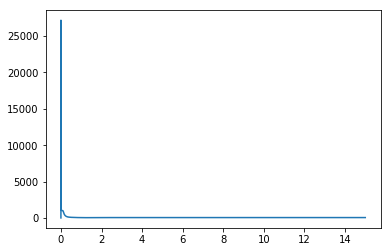

In [17]:
plt.figure()
plt.plot(t, muscleForce)
plt.show()

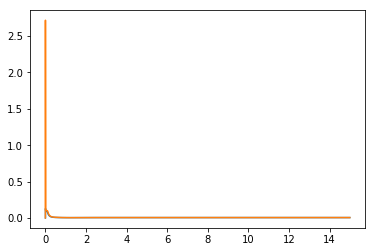

In [18]:
plt.figure()
plt.plot(t,activation*FL/plantarFlexor.Fmax, t, muscleForce/plantarFlexor.Fmax)
plt.show()

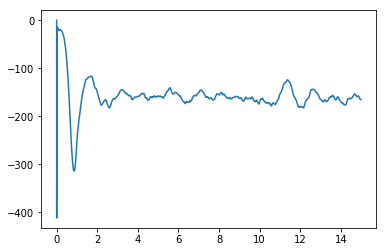

In [19]:
plt.figure()
plt.plot(t, muscleTorque)
plt.show()

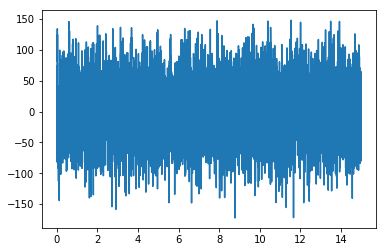

In [20]:
plt.figure()
plt.plot(t, noiseTorque)
plt.show()